In [1]:
# import packages 
import pandas as pd
# plot packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
# IMPORT DATA FROM DESEQ2

# NORMOXIA VS ANOXIA
na = pd.read_csv('comp_anoxia_normoxia.csv')
# rename first column to gene_id
na = na.rename(columns={'Unnamed: 0':'gene_id'})

# NORMOXIA VS REOXYGENATION
nr = pd.read_csv('comp_reoxygenation_normoxia.csv')
nr = nr.rename(columns={'Unnamed: 0':'gene_id'})

# ANOXIA VS REOXYGENATION
ar = pd.read_csv('comp_anoxia_reoxygenation.csv')
ar = ar.rename(columns={'Unnamed: 0':'gene_id'})

# IMPORT DATA FROM COMMON
common = pd.read_csv('/home/maggy/project_lncrna/6_identify_common_lncRNA/common_lncrna.tsv', header=None)
common = common.rename(columns={0:'gene_id'})

In [3]:
# filter the differentially expression df for significance 
na = na[na.padj < 0.01]
nr = nr[nr.padj < 0.01]
ar = ar[ar.padj < 0.01]

# filter the differentially expression df for log2foldchange (up and down regulated)
na_up = na[na.log2FoldChange > 0]
na_down = na[na.log2FoldChange < 0]
nr_up = nr[nr.log2FoldChange > 0]
nr_down = nr[nr.log2FoldChange < 0]
ar_up = ar[ar.log2FoldChange > 0]
ar_down = ar[ar.log2FoldChange < 0]

In [4]:
# check how many lncRNAs are differentially expressed in all three comparisons
print('Significantly differentially expressed lncRNAs')
# Normoxia vs Anoxia
na_sig = len(set(common['gene_id']).intersection(set(na['gene_id'])))
print('Normoxia vs Anoxia:', len(set(common['gene_id']).intersection(set(na['gene_id']))))
# Normoxia vs Reoxygenation
nr_sig = len(set(common['gene_id']).intersection(set(nr['gene_id'])))
print('Normoxia vs Reoxygenation:', len(set(common['gene_id']).intersection(set(nr['gene_id']))))
# Anoxia vs Reoxygenation
ar_sig = len(set(common['gene_id']).intersection(set(ar['gene_id'])))
print('Anoxia vs Reoxygenation:', len(set(common['gene_id']).intersection(set(ar['gene_id']))))

Significantly differentially expressed lncRNAs
Normoxia vs Anoxia: 160
Normoxia vs Reoxygenation: 87
Anoxia vs Reoxygenation: 41


In [6]:
na

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,MSTRG.1.1,1191.353966,0.422069,0.060668,0.717968,0.472777,1.000000
1,MSTRG.1.2,1188.561338,0.424613,0.060693,0.759578,0.447507,1.000000
2,MSTRG.2.1,1.009087,-1.410735,1.258514,-0.820193,0.412106,1.000000
3,ccar_ua01-g3.t2,151.067385,-0.551450,0.107964,-1.601817,0.109196,0.322301
4,ccar_ua01-g3.t2.1.6676fed8,153.718377,-0.551941,0.107589,-1.611961,0.106970,0.316432
...,...,...,...,...,...,...,...
125823,scaffold_72-g45758.t1,6.212233,-1.303093,0.531051,-1.741042,0.081676,0.248861
125824,scaffold_72-g45759.t1,23.442440,0.567697,0.233187,0.811301,0.417193,1.000000
125825,scaffold_72-g45760.t1,24.303876,0.754413,0.236615,1.588661,0.112137,0.329957
125826,scaffold_129-g45565.t1,6.130054,-0.737369,0.587273,-0.611057,0.541162,1.000000


In [5]:
common

,gene_id
0,ccar_ub21-ccar_g71991.t1
1,ccar_ua05-ccar_g9147.t1
2,ccar_ua13-ccar_g22588.t1
3,ccar_ua10-ccar_g19064.t1
4,ccar_ua04-ccar_g7316.t1
...,...
1548,ccar_ua13-ccar_g22683.t1
1549,ccar_ub23-ccar_g75335.t1
1550,ccar_ua01-ccar_g2470.t1
1551,ccar_ua03-ccar_g5678.t2


In [7]:
# check how many lncRNAs are upregulated in all three comparisons
print('Upregulated lncRNAs')
# Normoxia vs Anoxia
na_up_sig = len(set(common['gene_id']).intersection(set(na_up['gene_id'])))
print('Normoxia vs Anoxia:', len(set(common['gene_id']).intersection(set(na_up['gene_id']))))
# Normoxia vs Reoxygenation
nr_up_sig = len(set(common['gene_id']).intersection(set(nr_up['gene_id'])))
print('Normoxia vs Reoxygenation:', len(set(common['gene_id']).intersection(set(nr_up['gene_id']))))
# Anoxia vs Reoxygenation
ar_up_sig = len(set(common['gene_id']).intersection(set(ar_up['gene_id'])))
print('Anoxia vs Reoxygenation:', len(set(common['gene_id']).intersection(set(ar_up['gene_id']))))

# check how many lncRNAs are downregulated in all three comparisons
print('Downregulated lncRNAs')
# Normoxia vs Anoxia
na_down_sig = len(set(common['gene_id']).intersection(set(na_down['gene_id'])))
print('Normoxia vs Anoxia:', len(set(common['gene_id']).intersection(set(na_down['gene_id']))))
# Normoxia vs Reoxygenation
nr_down_sig = len(set(common['gene_id']).intersection(set(nr_down['gene_id'])))
print('Normoxia vs Reoxygenation:', len(set(common['gene_id']).intersection(set(nr_down['gene_id']))))
# Anoxia vs Reoxygenation
ar_down_sig = len(set(common['gene_id']).intersection(set(ar_down['gene_id'])))
print('Anoxia vs Reoxygenation:', len(set(common['gene_id']).intersection(set(ar_down['gene_id']))))

Upregulated lncRNAs


NameError: name 'na_up' is not defined

# Plot

In [6]:
# all *_up dataframes should have a positive value in the dict len(dataframe)
# this is used to create a barplot
dict_len = {'na_up': na_up_sig, 'na_down': -na_down_sig, 'nr_up': nr_up_sig, 'nr_down': -nr_down_sig, 'ar_up': ar_up_sig, 'ar_down': -ar_down_sig}

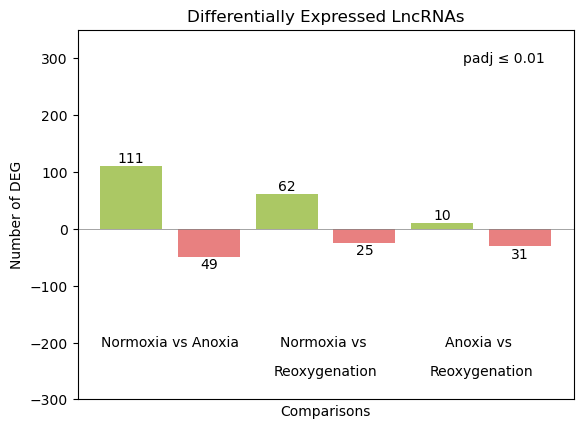

In [7]:
# plot histogram of the number of lncRNAs that are differentially expressed in all three comparisons
# Sample data
categories = dict_len.keys()
values = dict_len.values()

# Create a bar plot
plt.bar(categories, values, color='skyblue')
plt.title("Differentially Expressed LncRNAs")
plt.xlabel("Comparisons")
plt.ylabel("Number of DEG")


# Add labels to the bars
for i, value in enumerate(values):
    if i %2==0:
        plt.text(i, value + 1, str(abs(value)), ha='center', va='bottom', color='black')
    else:
        plt.text(i, value - 1, str(abs(value)), ha='center', va='top', color='black')

# change the color of the bars (first two: blue, second two: red, third two: green)
plt.bar(range(len(dict_len)), list(dict_len.values()), align='center', color=['#ABC864', '#E88080', '#ABC864', '#E88080', '#ABC864', '#E88080' ])

# extand the y scale from -500 to +700
plt.ylim(-300, 350)

# remove x scale
plt.xticks([])

# add a label in the center of the first two bars 
plt.text(0.5, -200, 'Normoxia vs Anoxia', ha='center', va='center', color='black')
plt.text(2.5, -200, 'Normoxia vs ', ha='center', va='center', color='black')
plt.text(2.5, -250, 'Reoxygenation', ha='center', va='center', color='black')
plt.text(4.5, -200, 'Anoxia vs ', ha='center', va='center', color='black')
plt.text(4.5, -250, 'Reoxygenation', ha='center', va='center', color='black')

# add a 0 line 
# the line should be slim and grey
plt.axhline(y=0, color='grey', linestyle='-', linewidth=0.5)

# add a lable in the top right corner of the plot
plt.text(4.8, 300, 'padj ≤ 0.01', ha='center', va='center', color='black')

# Save the figure as a high-quality image (e.g., PNG or PDF)
plt.savefig('diff_expr_lncrna_barplot.svg', dpi=600, bbox_inches='tight')
plt.savefig('diff_expr_lncrna_barplot.pdf', format='pdf', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()



# Extract sig dataframes

In [8]:
# keep only the rows that contain the gene id that are listed in the set(common['gene_id']).intersection(set(na['gene_id'])) for the na df
na_common = na[na['gene_id'].isin(set(common['gene_id']).intersection(set(na['gene_id'])))]
nr_common = nr[nr['gene_id'].isin(set(common['gene_id']).intersection(set(nr['gene_id'])))]
ar_common = ar[ar['gene_id'].isin(set(common['gene_id']).intersection(set(ar['gene_id'])))]

In [9]:
# export the dataframes to csv
na_common.to_csv('/home/maggy/project_lncrna/9_3_compare_all_&_only/lncRNA_na_all.csv')
nr_common.to_csv('/home/maggy/project_lncrna/9_3_compare_all_&_only/lncRNA_nr_all.csv')
ar_common.to_csv('/home/maggy/project_lncrna/9_3_compare_all_&_only/lncRNA_ar_all.csv')

na_common.to_csv('/home/maggy/project_lncrna/9_1_dea_lncrna/lncRNA_na_all.csv', index=False)
nr_common.to_csv('/home/maggy/project_lncrna/9_1_dea_lncrna/lncRNA_nr_all.csv', index=False)
ar_common.to_csv('/home/maggy/project_lncrna/9_1_dea_lncrna/lncRNA_ar_all.csv', index=False)

In [10]:
nr_common

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
901,ccar_ua01-ccar_g1149.t1,178.302354,1.146369,0.167463,3.352424,8.010721e-04,7.962244e-03
1180,ccar_ua01-ccar_g1327.t1,150.964417,1.348315,0.117133,6.516982,7.173610e-11,1.750569e-09
2787,ccar_ua01-ccar_g2470.t1,33.231440,1.407863,0.243185,3.383842,7.147924e-04,7.174673e-03
3481,ccar_ub01-ccar_g41102.t1,33.648820,1.337008,0.210897,3.565943,3.625501e-04,3.836525e-03
3766,ccar_ub01-ccar_g41299.t1,96.646846,1.260391,0.169782,3.978221,6.943295e-05,8.349480e-04
...,...,...,...,...,...,...,...
97177,ccar_ua25-ccar_g40122.t1,345.708514,0.898714,0.086764,3.616145,2.990225e-04,3.202852e-03
97772,ccar_ua25-ccar_g40562.t1,64.465577,-3.022709,0.256375,-9.508524,1.933866e-21,1.106220e-19
97918,ccar_ub25-ccar_g76815.t1,162.751544,-1.004420,0.092803,-4.519857,6.188130e-06,8.708167e-05
98495,ccar_ub25-ccar_g77243.t1,105.225408,2.456601,0.159350,11.745440,7.453318e-32,7.930081e-30


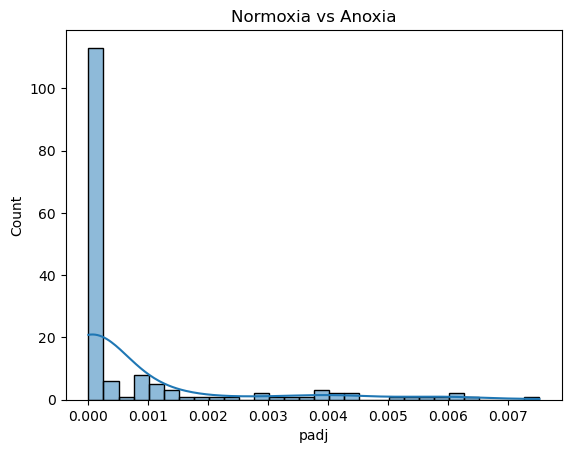

In [11]:
# plot a bell curve for padj values in na_common
sns.histplot(na_common['padj'], kde=True)
plt.title("Normoxia vs Anoxia")
plt.savefig('na_common_padj.svg', dpi=600, bbox_inches='tight')

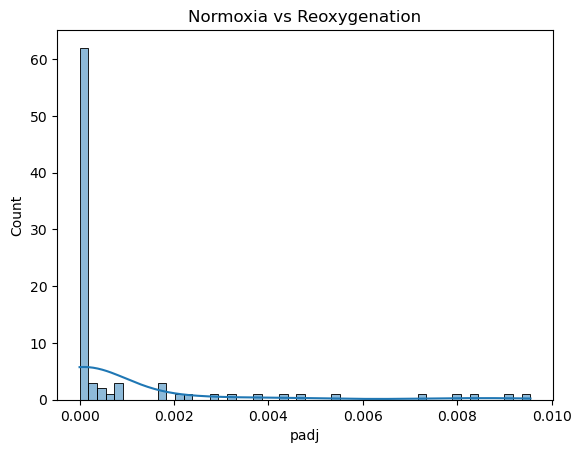

In [12]:
sns.histplot(nr_common['padj'], kde=True)
plt.title("Normoxia vs Reoxygenation")
plt.savefig('nr_common_padj.svg', dpi=600, bbox_inches='tight')

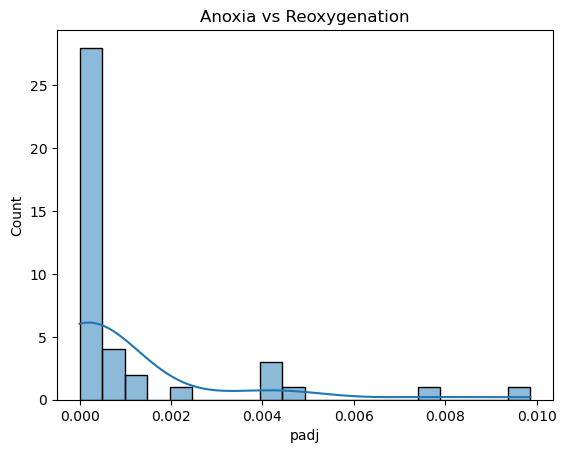

In [13]:
sns.histplot(ar_common['padj'], kde=True)
plt.title("Anoxia vs Reoxygenation")
plt.savefig('ar_common_padj.svg', dpi=600, bbox_inches='tight')